In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
import statsmodels.api as sm
import statsmodels.formula.api as smf

warnings.filterwarnings("ignore", category=FutureWarning)
from scipy.stats import pearsonr
from matplotlib.lines import Line2D
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

from scipy import stats
from scipy.stats import zscore
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV



In [15]:
exoplanets = pd.read_excel("Exoplanets2.xlsx")
exoplanets.head()

,Unnamed: 0,pl_name,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,pl_orbeccen,ttv_flag,st_teff,st_rad,st_mass,st_logg,sy_vmag,sy_kmag
0,30,KELT-9 b,2,1,1.481124,0.03462,21.196,915.35040,0.0000,0,10170.0,2.36,2.52,4.09,7.550,7.482
1,35,WASP-178 b,1,1,3.344829,0.05580,20.288,527.59780,0.0000,0,9360.0,1.67,2.07,4.31,9.946,9.703
2,38,KELT-20 b,1,1,3.474119,0.05700,20.512,5403.11000,0.0000,0,8980.0,1.60,1.89,4.31,7.590,7.415
3,56,MASCARA-4 b,2,1,2.824060,0.04700,17.150,985.27300,0.0000,0,7800.0,1.92,1.75,4.10,8.191,7.750
4,76,TOI-1431 b,1,1,2.650237,0.04600,16.701,991.62463,0.0022,0,7690.0,1.92,1.90,4.15,8.030,7.439


In [16]:
exoplanets.describe()

,Unnamed: 0,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,pl_orbeccen,ttv_flag,st_teff,st_rad,st_mass,st_logg,sy_vmag,sy_kmag
count,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000
mean,15979.201354,1.195431,1.675973,23.786868,0.111289,9.020524,365.877780,0.088729,0.102369,5421.643511,1.127893,0.989653,4.390406,11.798747,9.720131
std,15238.425738,0.439243,1.230056,131.101454,0.230093,5.790948,778.671425,0.140899,0.303261,904.353846,0.534411,0.304098,0.286323,2.115148,1.906986
min,30.000000,1.000000,1.000000,0.179715,0.005800,0.510000,0.070000,0.000000,0.000000,2960.000000,0.010000,0.140000,2.950000,5.569110,3.261000
25%,2166.500000,1.000000,1.000000,2.980421,0.039135,2.858000,11.825000,0.000000,0.000000,5065.750000,0.800000,0.822500,4.230000,10.324000,8.426750
50%,5368.000000,1.000000,1.000000,4.611488,0.055255,10.180000,122.840990,0.030000,0.000000,5609.500000,1.020000,0.990000,4.400000,11.828000,9.788000
75%,34058.750000,1.000000,2.000000,11.499270,0.096975,13.502750,365.499503,0.119000,0.000000,6000.000000,1.400000,1.190000,4.550000,13.139500,11.001750
max,36442.000000,4.000000,6.000000,3650.000000,4.500000,25.000000,8899.000000,0.941200,1.000000,10170.000000,6.300000,2.520000,7.920000,17.350000,15.548000


In [31]:
columnas_eliminar = ["pl_name","Unnamed: 0"]
data = exoplanets.drop(columns=columnas_eliminar)

data.head()

,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,pl_orbeccen,ttv_flag,st_teff,st_rad,st_mass,st_logg,sy_vmag,sy_kmag
0,2,1,1.481124,0.03462,21.196,915.35040,0.0000,0,10170.0,2.36,2.52,4.09,7.550,7.482
1,1,1,3.344829,0.05580,20.288,527.59780,0.0000,0,9360.0,1.67,2.07,4.31,9.946,9.703
2,1,1,3.474119,0.05700,20.512,5403.11000,0.0000,0,8980.0,1.60,1.89,4.31,7.590,7.415
3,2,1,2.824060,0.04700,17.150,985.27300,0.0000,0,7800.0,1.92,1.75,4.10,8.191,7.750
4,1,1,2.650237,0.04600,16.701,991.62463,0.0022,0,7690.0,1.92,1.90,4.15,8.030,7.439


In [32]:
data_cor = data.corr()
data_cor.head()

,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,pl_orbeccen,ttv_flag,st_teff,st_rad,st_mass,st_logg,sy_vmag,sy_kmag
sy_snum,1.000000,-0.028444,0.039601,0.075926,0.089281,0.069004,-0.058720,-0.048611,0.063069,0.016942,0.059272,0.030541,-0.057542,-0.041502
sy_pnum,-0.028444,1.000000,0.013519,0.058416,-0.512740,-0.185080,-0.069899,0.354576,-0.139587,-0.211206,-0.216096,0.160685,-0.172204,-0.215487
pl_orbper,0.039601,0.013519,1.000000,0.914380,-0.005016,0.162974,0.107014,0.047873,0.005626,0.079023,0.002052,-0.089277,0.035808,0.053043
pl_orbsmax,0.075926,0.058416,0.914380,1.000000,-0.045870,0.173020,0.195363,0.136894,0.061722,0.092720,0.045083,-0.110082,0.016782,0.065087
pl_rade,0.089281,-0.512740,-0.005016,-0.045870,1.000000,0.327612,0.022525,-0.112891,0.517589,0.517372,0.597357,-0.458328,0.186827,0.416678


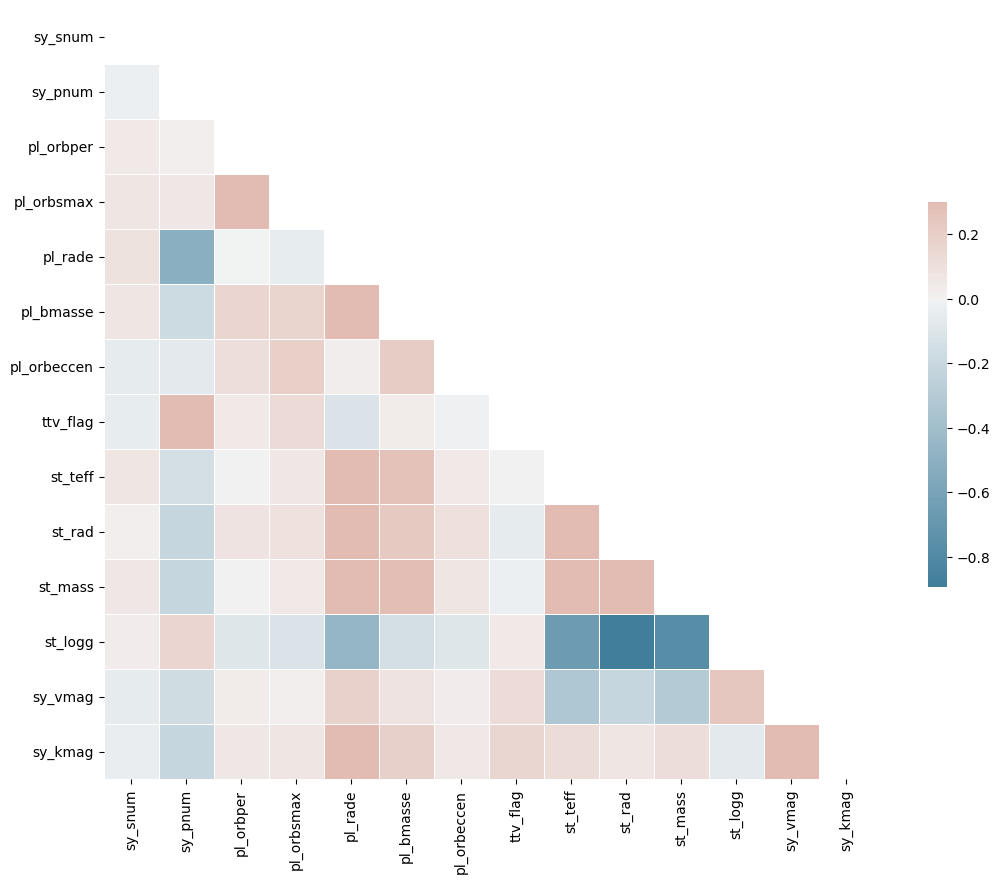

In [33]:
mask = np.triu(np.ones_like(data_cor))
plt.figure(figsize=(14, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(data_cor, mask=mask, cmap=cmap, vmax=0.3, center=0,
            square=True, annot=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

plt.show()

In [34]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [35]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(PCA())
pca_pipe.fit(data_scaled)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [37]:
# Se convierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = data.columns,
    index   = [f'PC{i+1}' for i in range(14)]
)

,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,pl_orbeccen,ttv_flag,st_teff,st_rad,st_mass,st_logg,sy_vmag,sy_kmag
PC1,0.034357,-0.182749,0.056379,0.067397,0.358774,0.197771,0.070276,-0.044760,0.424304,0.437488,0.465124,-0.420379,-0.089037,0.102521
PC2,-0.014014,-0.205496,0.226665,0.218636,0.219377,0.213030,0.117180,0.101738,-0.124663,-0.090845,-0.116172,0.112804,0.602829,0.572180
PC3,0.049389,0.245105,0.598765,0.626889,-0.219919,0.089815,0.165087,0.165628,0.004438,0.027238,-0.016649,-0.047098,-0.193006,-0.185339
PC4,0.225772,-0.522842,0.167779,0.099160,0.102420,0.096444,0.137128,-0.688832,-0.149344,-0.081958,-0.113614,0.122590,-0.125807,-0.227622
PC5,0.733564,0.052557,0.087151,0.065509,0.119272,-0.080012,-0.633290,0.088289,0.071878,-0.050049,0.033828,0.074984,0.020080,0.053987
PC6,-0.459228,-0.126082,0.250292,0.149614,0.015321,-0.575486,-0.480737,-0.222214,-0.062871,0.122133,-0.028286,-0.205577,0.087076,0.082240
PC7,-0.423417,-0.114822,0.076967,-0.010016,0.090722,0.635428,-0.515417,0.084473,0.058370,-0.152245,0.008471,0.210691,-0.152102,-0.150120
PC8,-0.000256,0.610229,-0.004063,-0.048146,-0.212502,0.277010,-0.103924,-0.630039,0.053028,0.079800,0.024202,-0.093338,0.168409,0.220920
PC9,0.102724,-0.082562,-0.035516,-0.096502,-0.119833,0.260569,-0.117584,0.138873,-0.582963,0.477744,-0.252983,-0.427124,0.116600,-0.169037
PC10,0.060814,-0.422710,-0.106479,0.052678,-0.815433,0.078264,-0.087267,0.032120,0.246356,0.005884,0.126043,-0.063424,0.057321,0.199703


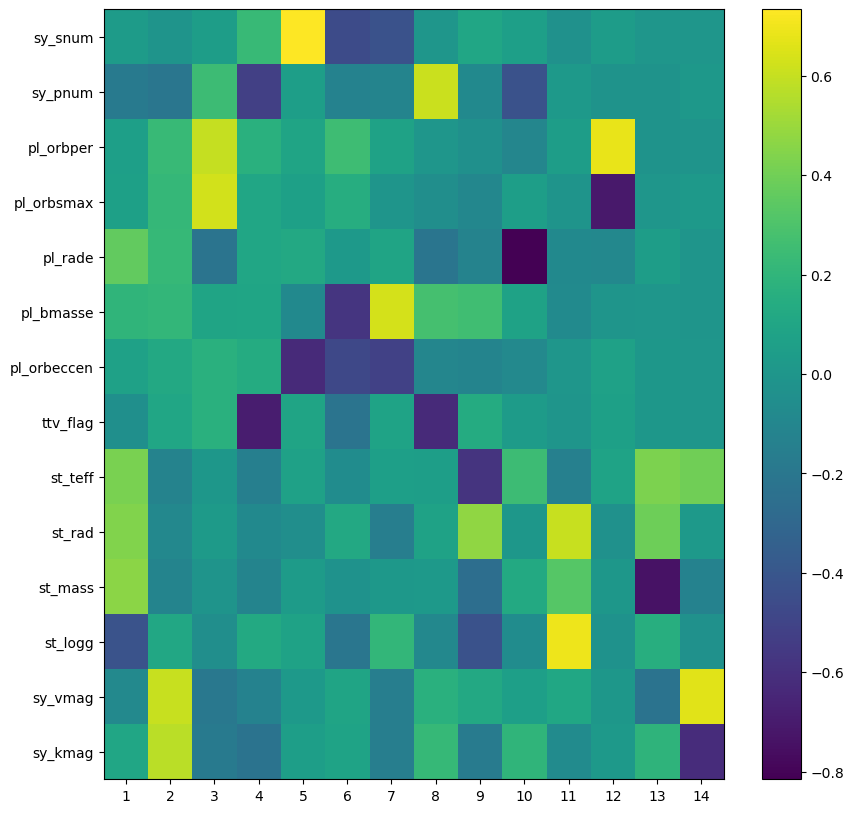

In [38]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(data.columns)), data.columns)
plt.xticks(range(len(data.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar()

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.29189819 0.16009241 0.14412895 0.09457599 0.07625212 0.07029763
 0.05343205 0.03837376 0.03293679 0.02157123 0.00791862 0.00499954
 0.0025012  0.00102151]


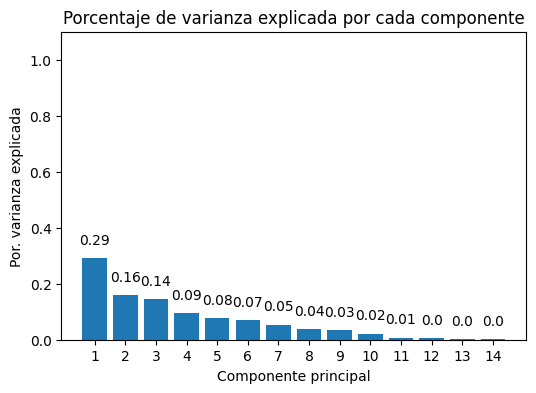

In [ ]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(data.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.29189819 0.4519906  0.59611955 0.69069554 0.76694766 0.83724529
 0.89067734 0.92905111 0.9619879  0.98355913 0.99147775 0.9964773
 0.99897849 1.        ]


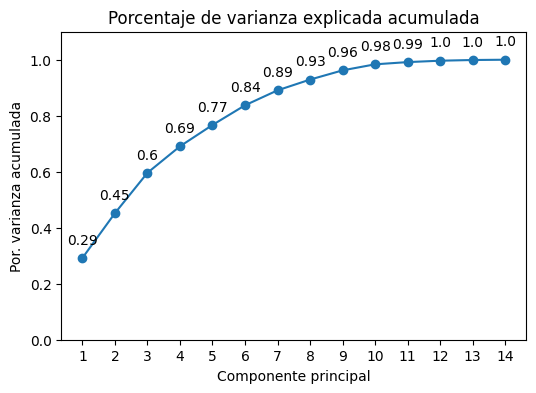

In [ ]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(data.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(data.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [ ]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones_ = pca_pipe.transform(X=data_scaled)
proyecciones = pd.DataFrame(
    proyecciones_,
    columns = [f"PC{i+1}" for i in range (14)],
    index   = data.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,7.075794,-2.971410,-0.257025,0.084795,2.092218,1.107543,0.471923,0.207802,2.590503,-0.387704,1.121665,-0.335784,0.435077,0.866282
1,4.911288,-1.219090,-0.798906,0.557285,0.543330,-0.216957,1.052167,0.126288,3.058228,-0.175403,0.686557,-0.170358,0.139109,0.701036
2,5.629453,-1.100270,0.201007,-0.605688,-0.083687,3.554821,5.376087,-1.100502,1.025981,-0.151708,-0.049313,-0.049132,-0.097858,0.559600
3,4.168720,-2.128422,-0.133473,-0.540330,1.789465,0.992666,0.356896,0.224224,0.716506,-0.039663,0.272889,-0.159444,0.060706,0.257416
4,4.159487,-2.272911,-0.201160,-0.050683,0.109205,0.023373,1.381274,0.265989,1.050241,0.052214,0.647739,-0.059038,0.463449,0.199998


In [ ]:
proyecciones_reducido = pd.DataFrame(
    proyecciones_[:,:9],
    columns = [f"PC{i+1}" for i in range (9)],
    index = data.index,
)

proyecciones_reducido.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,7.075794,-2.971410,-0.257025,0.084795,2.092218,1.107543,0.471923,0.207802,2.590503
1,4.911288,-1.219090,-0.798906,0.557285,0.543330,-0.216957,1.052167,0.126288,3.058228
2,5.629453,-1.100270,0.201007,-0.605688,-0.083687,3.554821,5.376087,-1.100502,1.025981
3,4.168720,-2.128422,-0.133473,-0.540330,1.789465,0.992666,0.356896,0.224224,0.716506
4,4.159487,-2.272911,-0.201160,-0.050683,0.109205,0.023373,1.381274,0.265989,1.050241


In [ ]:
# Proyección de las observaciones de entrenamiento, reducidas a las CP a utilizar
# ==============================================================================
proyecciones_reducido = pca_pipe.transform(X=data_scaled)
proyecciones_reducido = pd.DataFrame(
    proyecciones_reducido[:, :9],
    columns = [f"PC{i+1}" for i in range (9)],
    index   = data.index
)
proyecciones_reducido.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,7.075794,-2.971410,-0.257025,0.084795,2.092218,1.107543,0.471923,0.207802,2.590503
1,4.911288,-1.219090,-0.798906,0.557285,0.543330,-0.216957,1.052167,0.126288,3.058228
2,5.629453,-1.100270,0.201007,-0.605688,-0.083687,3.554821,5.376087,-1.100502,1.025981
3,4.168720,-2.128422,-0.133473,-0.540330,1.789465,0.992666,0.356896,0.224224,0.716506
4,4.159487,-2.272911,-0.201160,-0.050683,0.109205,0.023373,1.381274,0.265989,1.050241


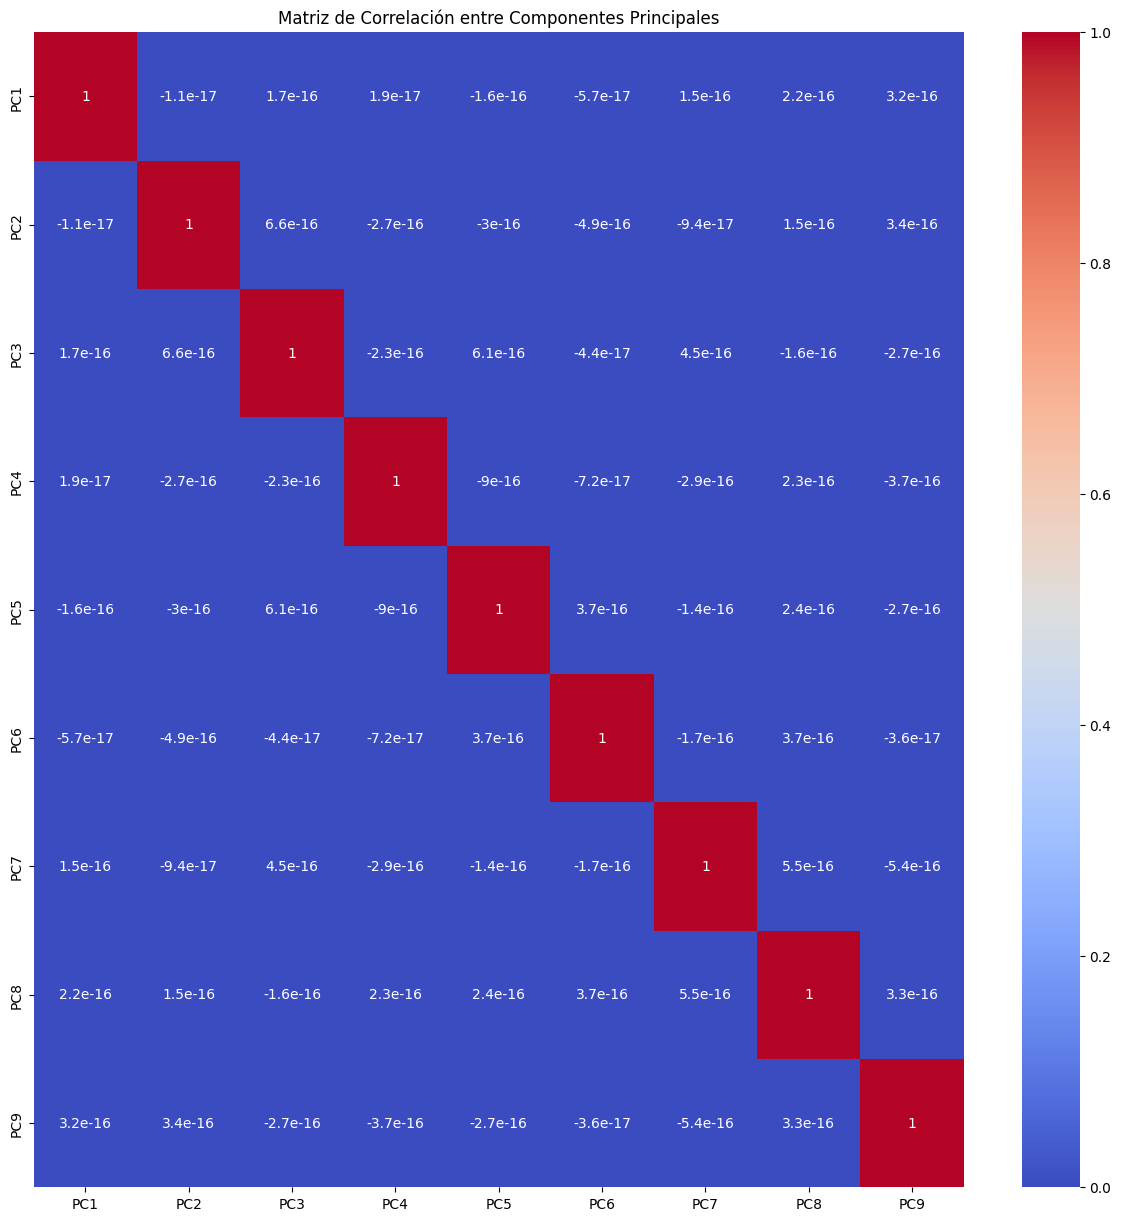

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(proyecciones_reducido.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre Componentes Principales')
plt.show()

           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     7.075794 -2.971410 -0.257025  0.084795  2.092218  1.107543  0.471923   
1     4.911288 -1.219090 -0.798906  0.557285  0.543330 -0.216957  1.052167   
2     5.629453 -1.100270  0.201007 -0.605688 -0.083687  3.554821  5.376087   
3     4.168720 -2.128422 -0.133473 -0.540330  1.789465  0.992666  0.356896   
4     4.159487 -2.272911 -0.201160 -0.050683  0.109205  0.023373  1.381274   
...        ...       ...       ...       ...       ...       ...       ...   
1177 -4.794623  0.931644 -0.120141 -0.842034 -0.277075 -0.261320  0.355816   
1178 -4.849281  0.818587 -0.374981 -0.784309 -0.350802 -0.154937  0.310642   
1179 -5.241439  2.066643 -0.708085 -0.030323  0.028738 -0.364944  0.141322   
1180 -5.480910  2.335384 -0.143963  2.273358  0.281028  0.382675  0.386805   
1181 -0.542037 -4.236828  1.202227 -0.199257 -0.211204 -0.124873  0.837768   

           PC8       PC9  
0     0.207802  2.590503  
1     0.1

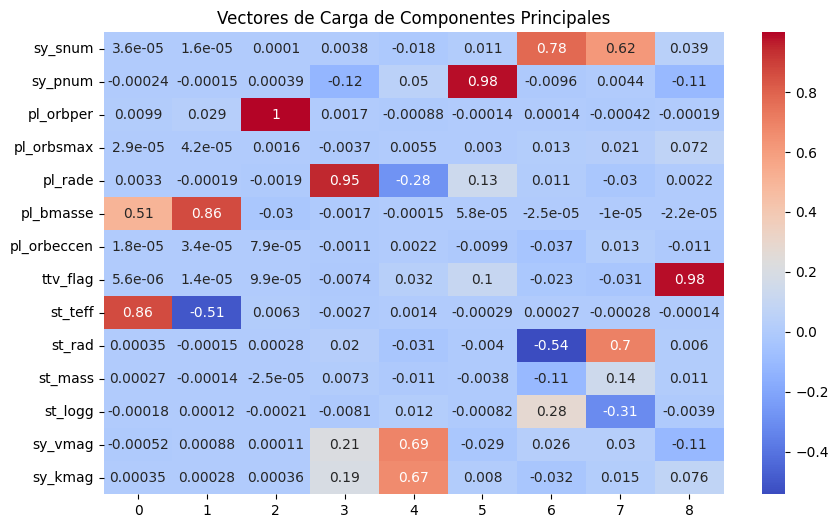

In [ ]:
# Vectores de carga de los componentes principales
features = data
pca = PCA(n_components=9)
datina = pca.fit_transform(features)
loadings = pd.DataFrame(pca.components_, columns=features.columns)
loadings = loadings.transpose()
print(proyecciones_reducido)
print(features)
print(loadings)

plt.figure(figsize=(10, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.title('Vectores de Carga de Componentes Principales')
plt.show()

<Figure size 1200x600 with 0 Axes>

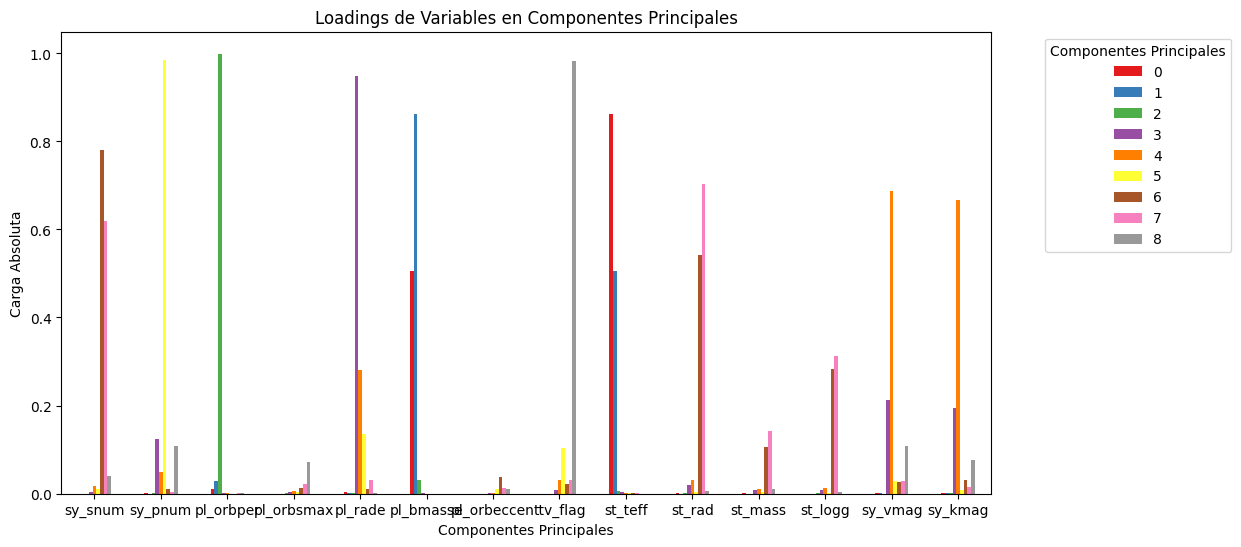

In [ ]:
# Visualizar los loadings
plt.figure(figsize=(12, 6))
ax = loadings.abs().plot(kind='bar', figsize=(12, 6), colormap='Set1')

# Configuraciones adicionales para personalización
ax.legend(title='Componentes Principales', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title('Loadings de Variables en Componentes Principales')
ax.set_xlabel('Componentes Principales')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylabel('Carga Absoluta')
plt.show()

In [ ]:
#Determinación de los pesos:
# Datos iniciales
varianzaPCs = modelo_pca.explained_variance_ratio_
relevancia = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
variables = ['pl_rade', 'st_teff', 'st_rad', 'pl_bmasse', 'sy_vmag', 'sy_snum', 'pl_orbper', 'ttv_flag', 'sy_kmag', 'sy_pnum']


pcs = {
    "PC1": {"variables": {"st_teff": 0.86, "pl_bmasse": 0.51}, "varianza": 0.292},
    "PC2": {"variables": {"pl_bmasse": 0.86, "st_teff": -0.51}, "varianza": 0.160},
    "PC3": {"variables": {"pl_orbper": 0.99}, "varianza": 0.144},
    "PC4": {"variables": {"pl_rade": 0.95, "sy_vmag": 0.21}, "varianza": 0.095},
    "PC5": {"variables": {"sy_vmag": 0.69, "sy_kmag": 0.67}, "varianza": 0.076},
    "PC6": {"variables": {"sy_pnum": 0.98}, "varianza": 0.070},
    "PC7": {"variables": {"sy_snum": 0.78, "st_rad": 0.70}, "varianza": 0.053},
    "PC8": {"variables": {"sy_pnum": 0.5}, "varianza": 0.038},
    "PC9": {"variables": {"ttv_flag": 0.98}, "varianza": 0.033},
}


relevancia_dict = dict(zip(variables, relevancia))

pesos_por_pc = {}

for pc, wrang in pcs.items():
    varianza = wrang["varianza"]
    variables_pc = wrang["variables"]
    peso_pc = 0

    # Calcular el peso total del PC basado en sus variables líderes
    for var, contrib in variables_pc.items():
        if var in relevancia_dict:
            peso_pc += varianza * abs(contrib) * relevancia_dict[var]

    pesos_por_pc[pc] = peso_pc


peso_total = sum(pesos_por_pc.values())
pesos_normalizados = {pc: peso / peso_total for pc, peso in pesos_por_pc.items()}


print("Pesos normalizados por PC:")
for pc, peso in sorted(pesos_normalizados.items(), key=lambda x: x[1], reverse=True):
    print(f"{pc}: {peso:.4f}")

class ExoplanetHabitabilityAnalyzer:
    def __init__(self, custom_weights=None):
        # Darles pesos a cada PC según la matriz de vectores de carga (Nos da la variable que "lidera" el PC)
        self.pca_weights = custom_weights or {
            'PC1': 0.4291,  # Peso calculado
            'PC2': 0.2205,  # Peso calculado
            'PC3': 0.0741,  # Peso calculado
            'PC4': 0.1328,  # Peso calculado
            'PC5': 0.0541,  # Peso calculado
            'PC6': 0.0089,  # Peso calculado
            'PC7': 0.0654,  # Peso calculado
            'PC8': 0.0025,  # Peso calculado
            'PC9': 0.0126   # Peso calculado
        }
        
        # Definir rangos "buenos" para cada PC
        self.optimal_ranges = {
            'PC1': {'min': -1.5, 'max': 1.5},   # Balance temperatura-masa
            'PC2': {'min': -1.0, 'max': 1.0},   # Balance masa-temperatura
            'PC3': {'min': -2.0, 'max': 2.0},   # Período orbital moderado
            'PC4': {'min': -1.0, 'max': 1.0},   # Tamaño terrestre
            'PC5': {'min': -2.0, 'max': 2.0},   # Luminosidad moderada
            'PC6': {'min': -1.0, 'max': 1.0},   # Sistema no muy complejo
            'PC7': {'min': -1.5, 'max': 1.5},   # Estrella estable
            'PC8': {'min': -1.0, 'max': 1.0},   # Características balanceadas
            'PC9': {'min': -1.0, 'max': 1.0}    # Órbita estable
        }

    def calculate_pc_score(self, pc_values, pc_num):
        """Calcula el score para un componente principal específico"""
        optimal_range = self.optimal_ranges[f'PC{pc_num+1}']
        
        # Normalizar el valor al rango óptimo (Esto lo saqué de un libro de mate)
        normalized_value = (pc_values[:, pc_num] - optimal_range['min']) / (optimal_range['max'] - optimal_range['min'])
        # Convertir a score entre 0 y 1
        score = 1 - np.minimum(1, np.abs(normalized_value - 0.5) * 2)
        
        return score

    def calculate_habitability_score(self, pca_transformed_data):
        """Calcula el score de habitabilidad basado en todos los componentes principales"""
        scores = np.zeros(len(pca_transformed_data))
        
        for i in range(9):  # Multiplica el score que le da a cada planeta por el peso del PC
            pc_score = self.calculate_pc_score(pca_transformed_data, i)
            scores += pc_score * self.pca_weights[f'PC{i+1}']
            
        return scores

    def analyze(self, X, pca_transformed):
        """Realiza el análisis completo de habitabilidad"""
        # Validación del len, o bueno, del tamaño de X y el pca (que en nuestro caso es proyecciones_reducido)
        if len(X) != len(pca_transformed):
            raise ValueError("El número de filas en los datos originales y las proyecciones PCA debe ser el mismo.")
        
        # 
        if pca_transformed.shape[1] < 9:
            raise ValueError("Se necesitan al menos 9 componentes principales en las proyecciones PCA.")
        
        habitability_scores = self.calculate_habitability_score(pca_transformed)
        
        # Estos son los results vaya
        results = pd.DataFrame({
            'habitability_score': habitability_scores,
            'habitability_class': pd.qcut(habitability_scores, 
                                          q=5, 
                                          labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])
        })
        
        # Calcular contribuciones para todos los PCs de forma vectorizada
        contributions = np.array([
            self.calculate_pc_score(pca_transformed, i) * self.pca_weights[f'PC{i+1}'] 
            for i in range(9)
        ]).T

        # Añadir cada contribución como columna al df
        for i in range(9):
            results[f'PC{i+1}_contribution'] = contributions[:, i]
        
        return results

def get_top_candidates(original_data, results, n=10):
    """Obtiene los n mejores candidatos con detalles"""
    top_indices = results.nlargest(n, 'habitability_score').index
    
    top_candidates = pd.concat([
        original_data.iloc[top_indices],
        results.loc[top_indices, ['habitability_score', 'habitability_class']]
    ], axis=1)
    
    return top_candidates[['pl_name', 'habitability_score', 'habitability_class',
                          'pl_rade', 'st_teff', 'st_rad', 'pl_bmasse', 'sy_vmag', 'sy_snum', 'pl_orbper', 'ttv_flag', 'sy_kmag', 'sy_pnum']]


Pesos normalizados por PC:
PC1: 0.4291
PC2: 0.2205
PC4: 0.1328
PC3: 0.0741
PC7: 0.0654
PC5: 0.0541
PC9: 0.0126
PC6: 0.0089
PC8: 0.0025


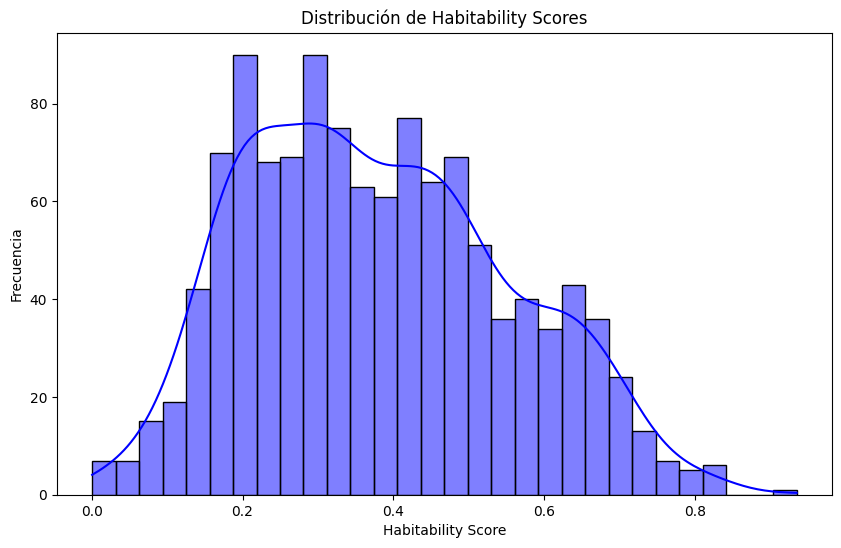

In [ ]:
#iniciar la class de analyzer
analyzer = ExoplanetHabitabilityAnalyzer()

if isinstance(proyecciones_reducido, pd.DataFrame):
    proyecciones_reducido = proyecciones_reducido.to_numpy()
# Generar resultados de habitabilidad
results = analyzer.analyze(exoplanets, proyecciones_reducido)

# Histograma de Habitability Score
plt.figure(figsize=(10, 6))
sns.histplot(results['habitability_score'], kde=True, bins=30, color='blue')
plt.title('Distribución de Habitability Scores')
plt.xlabel('Habitability Score')
plt.ylabel('Frecuencia')
plt.show()

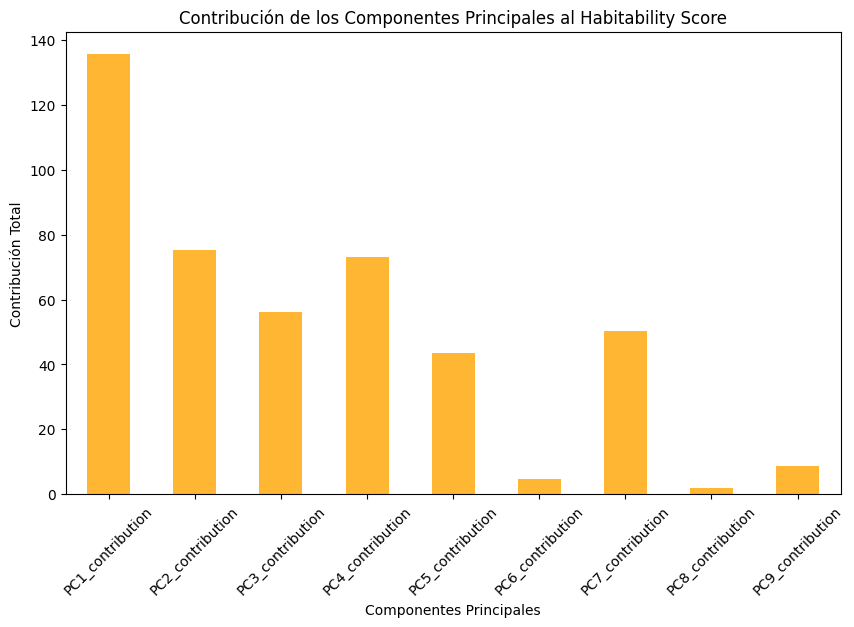

In [ ]:
# Sumar todas las contribuciones por componente
pc_contributions = results[[f'PC{i+1}_contribution' for i in range(9)]].sum()

# Gráfico de barras
plt.figure(figsize=(10, 6))
pc_contributions.plot(kind='bar', color='orange', alpha=0.8)
plt.title('Contribución de los Componentes Principales al Habitability Score')
plt.xlabel('Componentes Principales')
plt.ylabel('Contribución Total')
plt.xticks(rotation=45)
plt.show()


              pl_name  habitability_score habitability_class  pl_rade  \
208         HATS-38 b            0.934210          Very High    6.882   
402        TOI-2196 b            0.836437          Very High    3.510   
1123        WASP-41 b            0.834641          Very High   13.227   
633        WASP-105 b            0.829054          Very High   10.761   
408        WASP-130 b            0.827867          Very High    9.976   
1056        TOI-905 b            0.827054          Very High   13.126   
845        TOI-1420 b            0.811269          Very High   11.890   
1125        WASP-47 b            0.796953          Very High   12.900   
300         WASP-60 b            0.796443          Very High    9.640   
913        TOI-2000 c            0.791688          Very High    8.140   
443         WASP-83 b            0.790475          Very High   11.657   
924        TOI-2107 b            0.786093          Very High   13.574   
419         WASP-65 b            0.775880          

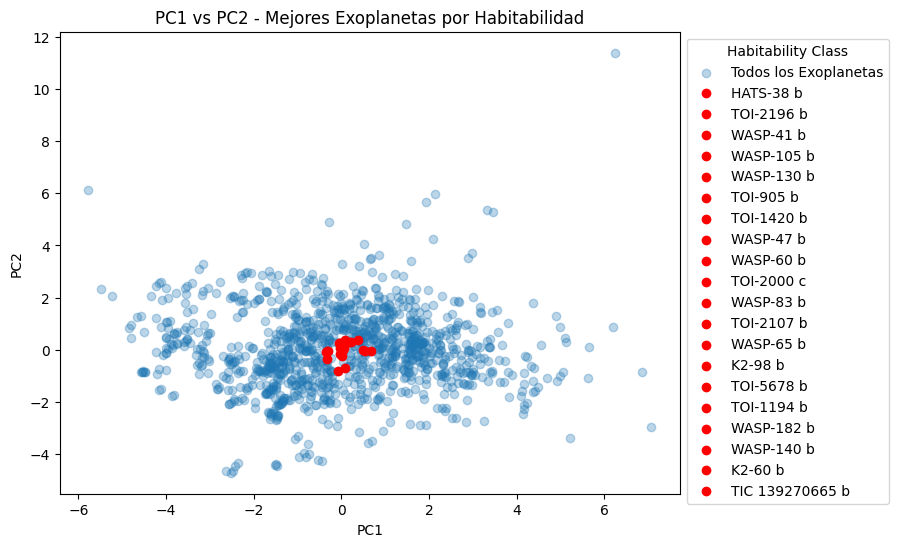

In [ ]:

results = analyzer.analyze(data, proyecciones_reducido)
top_candidates = get_top_candidates(exoplanets, results, n=20)


print(top_candidates)


plt.figure(figsize=(8, 6))
plt.scatter(
    proyecciones_reducido[:, 0],  
    proyecciones_reducido[:, 1],  
    alpha=0.3,                   
    label='Todos los Exoplanetas'
)

for planet in top_candidates['pl_name']:
    candidate_index = exoplanets[exoplanets['pl_name'] == planet].index[0]
    plt.scatter(
        proyecciones_reducido[candidate_index, 0],  # PC1
        proyecciones_reducido[candidate_index, 1],  # PC2
        color='red',
        label=planet
    )

plt.title('PC1 vs PC2 - Mejores Exoplanetas por Habitabilidad')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Habitability Class', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

ANÁLISIS DE REGRESIÓN LÍNEAL

In [40]:
df = pd.read_excel("Exoplanets2.xlsx")

df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1182 non-null   int64  
 1   pl_name      1182 non-null   object 
 2   sy_snum      1182 non-null   int64  
 3   sy_pnum      1182 non-null   int64  
 4   pl_orbper    1182 non-null   float64
 5   pl_orbsmax   1182 non-null   float64
 6   pl_rade      1182 non-null   float64
 7   pl_bmasse    1182 non-null   float64
 8   pl_orbeccen  1182 non-null   float64
 9   ttv_flag     1182 non-null   int64  
 10  st_teff      1182 non-null   float64
 11  st_rad       1182 non-null   float64
 12  st_mass      1182 non-null   float64
 13  st_logg      1182 non-null   float64
 14  sy_vmag      1182 non-null   float64
 15  sy_kmag      1182 non-null   float64
dtypes: float64(11), int64(4), object(1)
memory usage: 147.9+ KB


In [41]:
exo_pl_name = df["pl_name"]
df = df.drop(columns=["pl_name", "Unnamed: 0"])

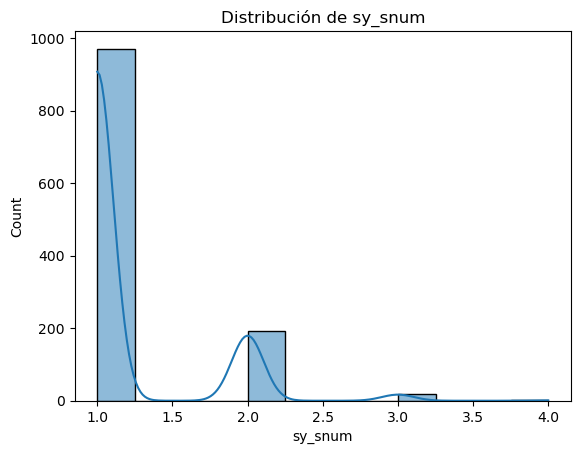

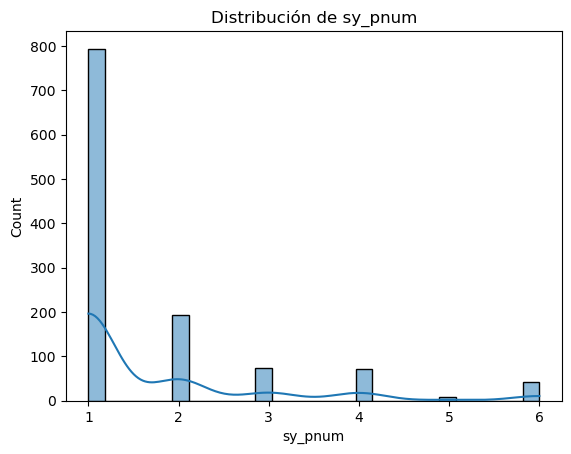

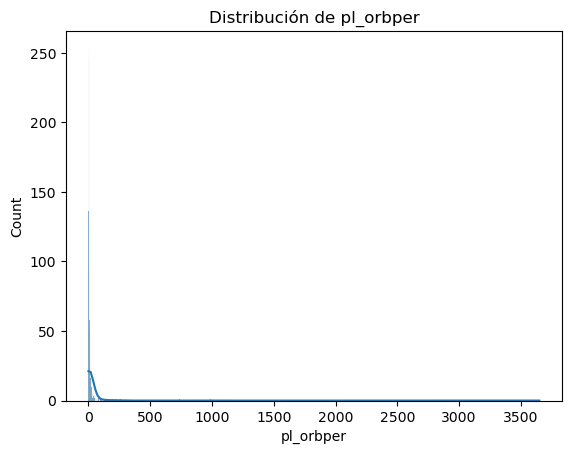

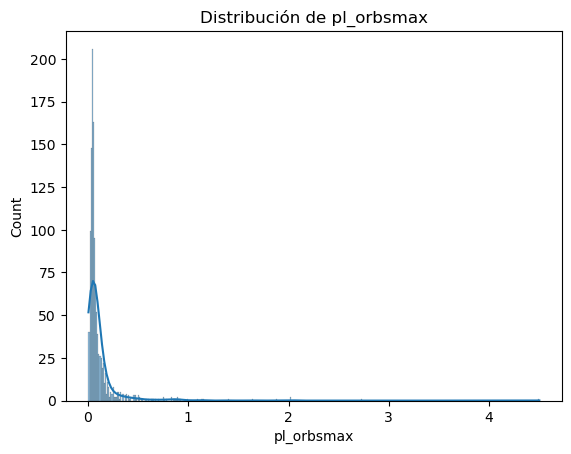

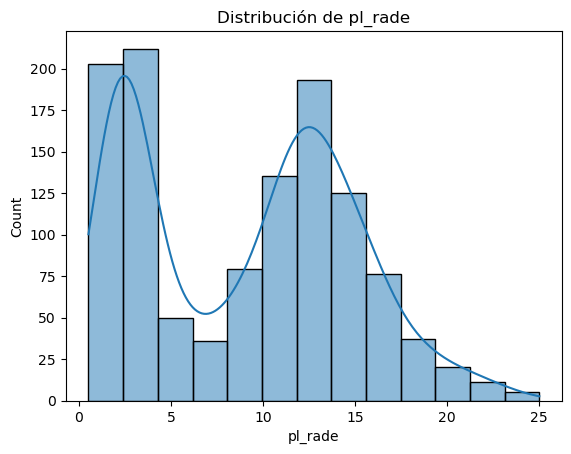

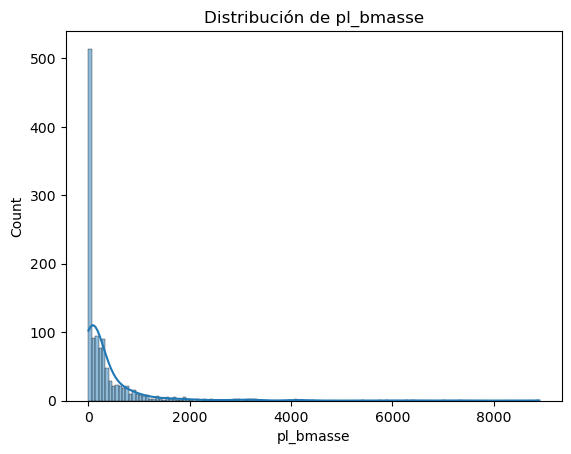

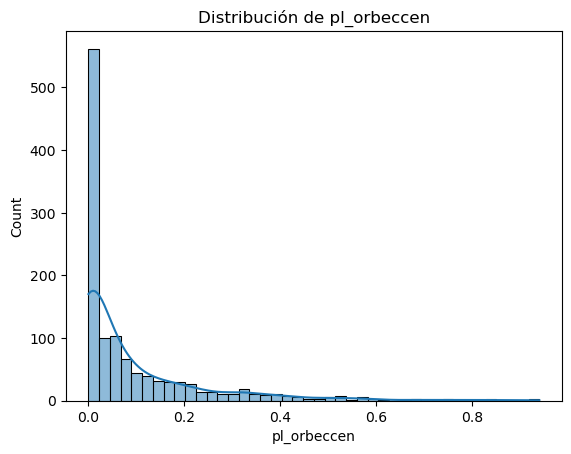

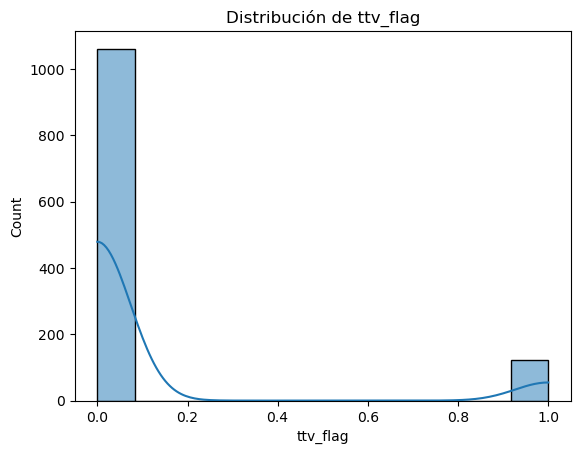

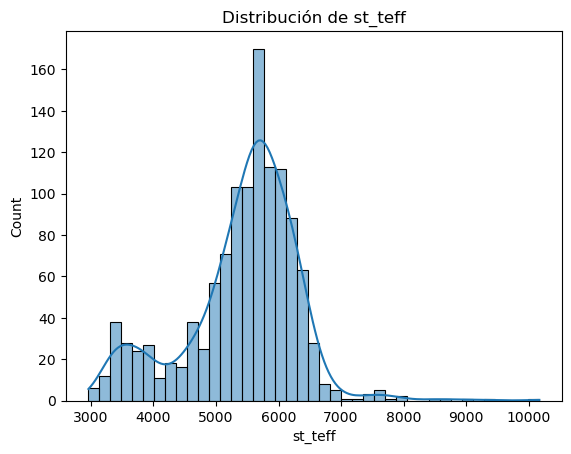

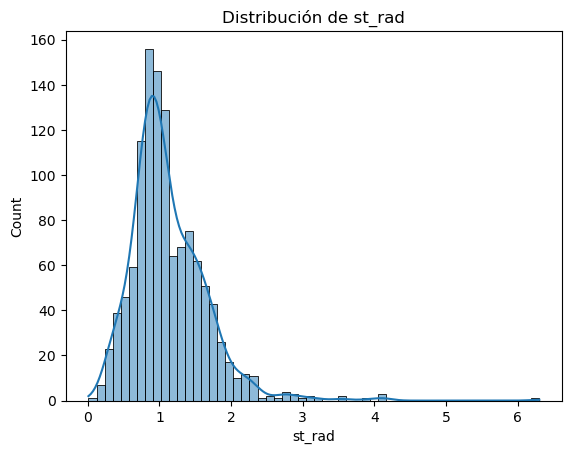

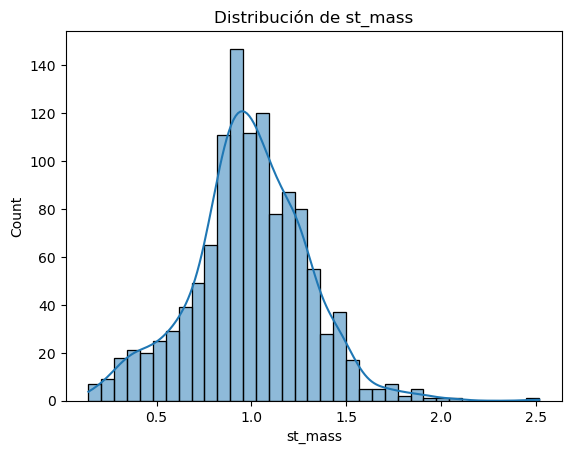

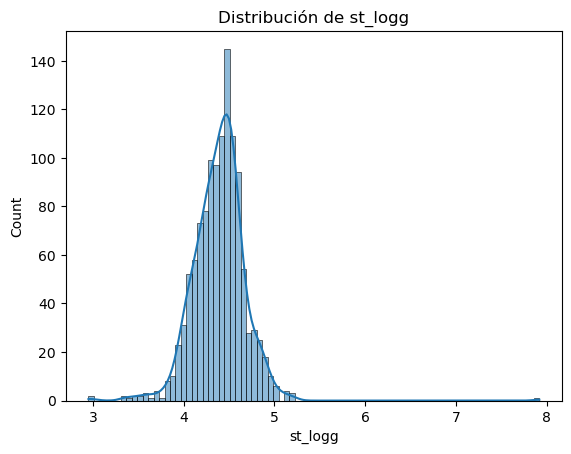

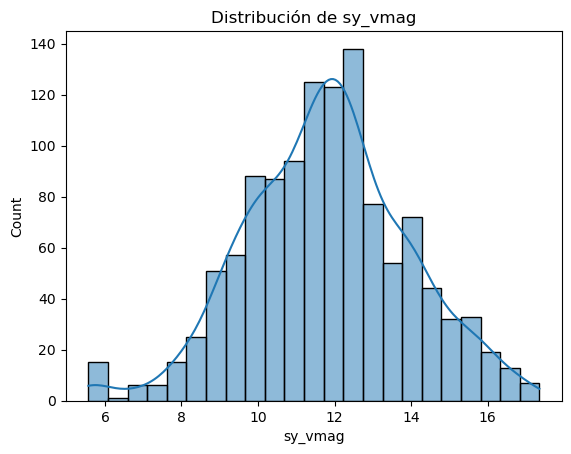

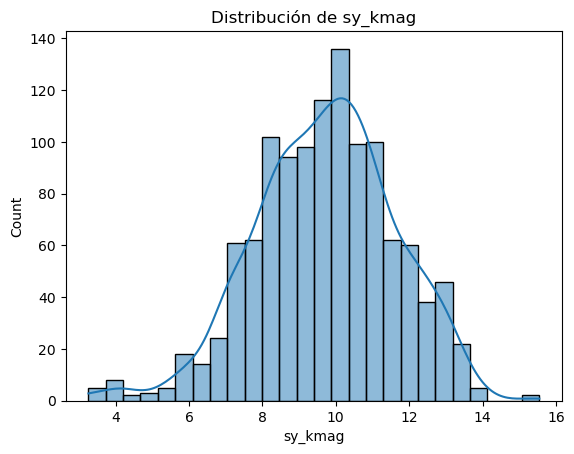

array([[ 2.       ,  1.       ,  1.4811235, ...,  4.09     ,  7.55     ,
         7.482    ],
       [ 1.       ,  1.       ,  3.3448285, ...,  4.31     ,  9.946    ,
         9.703    ],
       [ 1.       ,  1.       ,  3.474119 , ...,  4.31     ,  7.59     ,
         7.415    ],
       ...,
       [ 1.       ,  3.       ,  4.9899093, ...,  5.12     , 16.91     ,
        10.644    ],
       [ 1.       ,  3.       ,  2.753436 , ...,  5.12     , 16.91     ,
        10.644    ],
       [ 1.       ,  3.       ,  6.26834  , ...,  4.36     ,  5.65     ,
         4.241    ]])

In [42]:
(df.duplicated()).sum()

for column in df.columns:
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribución de {column}")
    plt.show()

z_scores = zscore(df)
outliers = (z_scores > 3).sum(axis=0)
outliers

selector = VarianceThreshold(threshold=0.01)
df_reduced = selector.fit_transform(df)
df_reduced

In [43]:
results_pca = pd.read_excel("results_exoplanets.xlsx")
df_new = df.drop(columns = ["st_mass","st_teff","pl_orbsmax","pl_orbper"])
df_new["st_mass_steff"] = df["st_mass"] + df["st_teff"]
df_new["st_orbs"] = df["pl_orbsmax"] + df["pl_orbper"]

In [44]:
# modelo 1 (datos originales)
# -----------------------------------------------------------------------------------

X = df
y = results_pca["habitability_score"]

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

        feature         VIF
0       sy_snum    8.966660
1       sy_pnum    4.610349
2     pl_orbper    7.292185
3    pl_orbsmax    9.251161
4       pl_rade    9.141842
5     pl_bmasse    1.508484
6   pl_orbeccen    1.606070
7      ttv_flag    1.431001
8       st_teff  504.349220
9        st_rad   24.400581
10      st_mass  200.624079
11      st_logg  349.759955
12      sy_vmag  937.073928
13      sy_kmag  708.732219


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),
    train_size = 0.8,
    random_state = 512,
    shuffle = True
    )

X.columns
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sy_snum      1182 non-null   int64  
 1   sy_pnum      1182 non-null   int64  
 2   pl_orbper    1182 non-null   float64
 3   pl_orbsmax   1182 non-null   float64
 4   pl_rade      1182 non-null   float64
 5   pl_bmasse    1182 non-null   float64
 6   pl_orbeccen  1182 non-null   float64
 7   ttv_flag     1182 non-null   int64  
 8   st_teff      1182 non-null   float64
 9   st_rad       1182 non-null   float64
 10  st_mass      1182 non-null   float64
 11  st_logg      1182 non-null   float64
 12  sy_vmag      1182 non-null   float64
 13  sy_kmag      1182 non-null   float64
dtypes: float64(11), int64(3)
memory usage: 129.4 KB


In [46]:
exo_planets_train = pd.DataFrame(np.hstack((X_train, y_train)),columns=['sy_snum', 'sy_pnum', 'pl_orbper', 'pl_orbsmax', 'pl_rade', 'pl_bmasse', 'pl_orbeccen', 'ttv_flag', 'st_teff', 'st_rad', 'st_mass', 'st_logg', 'sy_vmag', 'sy_kmag', "habitability_score"])

In [47]:
modelf = smf.ols(formula = "habitability_score ~ sy_snum + sy_pnum + pl_orbper + pl_orbsmax + pl_rade + pl_bmasse + pl_orbeccen + ttv_flag + st_teff + st_rad + st_mass + st_logg + sy_vmag + sy_kmag", data = exo_planets_train)
modelf = modelf.fit()
modelf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     habitability_score   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     47.39
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           1.42e-98
Time:                        21:24:31   Log-Likelihood:                 559.47
No. Observations:                 945   AIC:                            -1089.
Df Residuals:                     930   BIC:                            -1016.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.5443      0.206      7.507      0.000       1.141       1.948
sy_snum        -0.0567      0.010     -5.401      0.000      -0.077      -0.036
sy_pnum        -0.0500      0.005    -10.944      0.000      -0.059      -0.041
pl_orbper       0.0003      0.000      1.837      0.066   -2.28e-05       0.001
pl_orbsmax     -0.2609      0.079     -3.303      0.001      -0.416      -0.106
pl_rade        -0.0052      0.001     -4.144      0.000      -0.008      -0.003
pl_bmasse   -4.003e-05   6.53e-06     -6.134      0.000   -5.28e-05   -2.72e-05
pl_orbeccen    -0.2026      0.035     -5.867      0.000      -0.270      -0.135
ttv_flag       -0.0210      0.017     -1.263      0.207      -0.054       0.012
st_teff       9.45e-06   2.06e-05      0.458      0.647    -3.1e-05    4.99e-05
st_rad         -0.1310      0.027     -4.803      0.000      -0.184      -0.077
st_mass        -0.1719      0.066     -2.609      0.009      -0.301      -0.043
st_logg        -0.1332      0.037     -3.590      0.000      -0.206      -0.060
sy_vmag        -0.1190      0.012    -10.164      0.000      -0.142      -0.096
sy_kmag         0.1383      0.012     11.330      0.000       0.114       0.162
==============================================================================
Omnibus:                       13.847   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               12.993
Skew:                           0.245   Prob(JB):                      0.00151
Kurtosis:                       2.699   Cond. No.                     2.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
modelf_noint = smf.ols(formula = "habitability_score ~ 0 + sy_snum + sy_pnum + pl_orbper + pl_orbsmax + pl_rade + pl_bmasse + pl_orbeccen + ttv_flag + st_teff + st_rad + st_mass + st_logg + sy_vmag + sy_kmag", data = exo_planets_train)
modelf_noint = modelf_noint.fit()
modelf_noint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     habitability_score   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.890
Method:                 Least Squares   F-statistic:                              547.9
Date:                Wed, 27 Nov 2024   Prob (F-statistic):                        0.00
Time:                        21:24:41   Log-Likelihood:                          531.67
No. Observations:                 945   AIC:                                     -1035.
Df Residuals:                     931   BIC:                                     -967.4
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sy_snum        -0.0615      0.011     -5.699      0.000      -0.083      -0.040
sy_pnum        -0.0469      0.005    -10.013      0.000      -0.056      -0.038
pl_orbper       0.0003      0.000      1.373      0.170      -0.000       0.001
pl_orbsmax     -0.2204      0.081     -2.717      0.007      -0.380      -0.061
pl_rade        -0.0053      0.001     -4.117      0.000      -0.008      -0.003
pl_bmasse   -5.213e-05   6.51e-06     -8.007      0.000   -6.49e-05   -3.94e-05
pl_orbeccen    -0.1907      0.036     -5.370      0.000      -0.260      -0.121
ttv_flag       -0.0273      0.017     -1.602      0.109      -0.061       0.006
st_teff      8.259e-05   1.87e-05      4.413      0.000    4.59e-05       0.000
st_rad          0.0067      0.021      0.320      0.749      -0.034       0.047
st_mass        -0.3045      0.065     -4.661      0.000      -0.433      -0.176
st_logg         0.1077      0.019      5.615      0.000       0.070       0.145
sy_vmag        -0.0930      0.012     -8.083      0.000      -0.116      -0.070
sy_kmag         0.1139      0.012      9.401      0.000       0.090       0.138
==============================================================================
Omnibus:                        7.666   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                9.049
Skew:                           0.121   Prob(JB):                       0.0108
Kurtosis:                       3.414   Cond. No.                     9.96e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
modelf_noint = smf.ols(formula = "habitability_score ~ 0 +sy_snum + sy_pnum + pl_orbper + pl_orbsmax + pl_rade + pl_bmasse + pl_orbeccen + ttv_flag + st_teff + st_mass + st_logg + sy_vmag + sy_kmag", data = exo_planets_train)
modelf_noint = modelf_noint.fit()
modelf_noint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     habitability_score   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.890
Method:                 Least Squares   F-statistic:                              590.6
Date:                Wed, 27 Nov 2024   Prob (F-statistic):                        0.00
Time:                        21:24:55   Log-Likelihood:                          531.62
No. Observations:                 945   AIC:                                     -1037.
Df Residuals:                     932   BIC:                                     -974.2
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sy_snum        -0.0616      0.011     -5.716      0.000      -0.083      -0.040
sy_pnum        -0.0468      0.005    -10.025      0.000      -0.056      -0.038
pl_orbper       0.0003      0.000      1.357      0.175      -0.000       0.001
pl_orbsmax     -0.2185      0.081     -2.702      0.007      -0.377      -0.060
pl_rade        -0.0053      0.001     -4.130      0.000      -0.008      -0.003
pl_bmasse   -5.236e-05   6.47e-06     -8.096      0.000   -6.51e-05   -3.97e-05
pl_orbeccen    -0.1903      0.035     -5.366      0.000      -0.260      -0.121
ttv_flag       -0.0278      0.017     -1.632      0.103      -0.061       0.006
st_teff      8.234e-05   1.87e-05      4.406      0.000    4.57e-05       0.000
st_mass        -0.2912      0.051     -5.762      0.000      -0.390      -0.192
st_logg         0.1059      0.018      5.775      0.000       0.070       0.142
sy_vmag        -0.0917      0.011     -8.596      0.000      -0.113      -0.071
sy_kmag         0.1125      0.011      9.886      0.000       0.090       0.135
==============================================================================
Omnibus:                        7.103   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                8.161
Skew:                           0.121   Prob(JB):                       0.0169
Kurtosis:                       3.385   Cond. No.                     9.91e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
modelf_noint = smf.ols(formula = "habitability_score ~ 0 +sy_snum + sy_pnum + pl_orbsmax + pl_rade + pl_bmasse + pl_orbeccen + ttv_flag + st_teff + st_mass + st_logg + sy_vmag + sy_kmag", data = exo_planets_train)
modelf_noint = modelf_noint.fit()
modelf_noint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     habitability_score   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.890
Method:                 Least Squares   F-statistic:                              639.1
Date:                Wed, 27 Nov 2024   Prob (F-statistic):                        0.00
Time:                        21:25:07   Log-Likelihood:                          530.68
No. Observations:                 945   AIC:                                     -1037.
Df Residuals:                     933   BIC:                                     -979.2
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sy_snum        -0.0629      0.011     -5.865      0.000      -0.084      -0.042
sy_pnum        -0.0465      0.005     -9.969      0.000      -0.056      -0.037
pl_orbsmax     -0.1137      0.024     -4.737      0.000      -0.161      -0.067
pl_rade        -0.0049      0.001     -3.923      0.000      -0.007      -0.002
pl_bmasse   -5.296e-05   6.45e-06     -8.206      0.000   -6.56e-05   -4.03e-05
pl_orbeccen    -0.1927      0.035     -5.437      0.000      -0.262      -0.123
ttv_flag       -0.0330      0.017     -1.993      0.047      -0.066      -0.001
st_teff      8.061e-05   1.87e-05      4.321      0.000     4.4e-05       0.000
st_mass        -0.2925      0.051     -5.785      0.000      -0.392      -0.193
st_logg         0.1071      0.018      5.842      0.000       0.071       0.143
sy_vmag        -0.0917      0.011     -8.595      0.000      -0.113      -0.071
sy_kmag         0.1124      0.011      9.870      0.000       0.090       0.135
==============================================================================
Omnibus:                        7.339   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                8.217
Skew:                           0.136   Prob(JB):                       0.0164
Kurtosis:                       3.367   Cond. No.                     6.35e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
modelf_noint = smf.ols(formula = "habitability_score ~ 0 +sy_snum + sy_pnum + pl_orbsmax + pl_rade + pl_bmasse + pl_orbeccen + ttv_flag + st_teff + st_mass + st_logg", data = exo_planets_train)
modelf_noint = modelf_noint.fit()
modelf_noint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     habitability_score   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.877
Method:                 Least Squares   F-statistic:                              675.5
Date:                Wed, 27 Nov 2024   Prob (F-statistic):                        0.00
Time:                        21:25:19   Log-Likelihood:                          476.74
No. Observations:                 945   AIC:                                     -933.5
Df Residuals:                     935   BIC:                                     -885.0
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sy_snum        -0.0703      0.011     -6.233      0.000      -0.092      -0.048
sy_pnum        -0.0471      0.005     -9.561      0.000      -0.057      -0.037
pl_orbsmax     -0.0900      0.025     -3.577      0.000      -0.139      -0.041
pl_rade        -0.0026      0.001     -2.141      0.033      -0.005      -0.000
pl_bmasse   -4.943e-05   6.81e-06     -7.254      0.000   -6.28e-05   -3.61e-05
pl_orbeccen    -0.2010      0.037     -5.381      0.000      -0.274      -0.128
ttv_flag       -0.0046      0.017     -0.269      0.788      -0.038       0.029
st_teff         0.0002   1.48e-05     13.346      0.000       0.000       0.000
st_mass        -0.4569      0.051     -9.006      0.000      -0.556      -0.357
st_logg        -0.0015      0.009     -0.170      0.865      -0.019       0.016
==============================================================================
Omnibus:                       11.314   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.080
Skew:                           0.237   Prob(JB):                      0.00393
Kurtosis:                       2.760   Cond. No.                     5.93e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
modelf_noint = smf.ols(formula = "habitability_score ~ 0 +sy_snum + sy_pnum + pl_orbsmax + pl_rade + pl_bmasse + pl_orbeccen + st_teff + st_mass", data = exo_planets_train)
modelf_noint = modelf_noint.fit()
modelf_noint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     habitability_score   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.877
Method:                 Least Squares   F-statistic:                              846.1
Date:                Wed, 27 Nov 2024   Prob (F-statistic):                        0.00
Time:                        21:25:27   Log-Likelihood:                          476.69
No. Observations:                 945   AIC:                                     -937.4
Df Residuals:                     937   BIC:                                     -898.6
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sy_snum        -0.0707      0.011     -6.636      0.000      -0.092      -0.050
sy_pnum        -0.0476      0.005    -10.341      0.000      -0.057      -0.039
pl_orbsmax     -0.0907      0.025     -3.675      0.000      -0.139      -0.042
pl_rade        -0.0026      0.001     -2.187      0.029      -0.005      -0.000
pl_bmasse   -4.959e-05   6.76e-06     -7.336      0.000   -6.29e-05   -3.63e-05
pl_orbeccen    -0.2013      0.037     -5.456      0.000      -0.274      -0.129
st_teff         0.0002   7.81e-06     25.024      0.000       0.000       0.000
st_mass        -0.4505      0.035    -12.797      0.000      -0.520      -0.381
==============================================================================
Omnibus:                       11.598   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.375
Skew:                           0.240   Prob(JB):                      0.00339
Kurtosis:                       2.760   Cond. No.                     4.36e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
modelf_noint.conf_int(alpha=0.05)

,0,1
sy_snum,-0.091658,-0.049820
sy_pnum,-0.056648,-0.038577
pl_orbsmax,-0.139063,-0.042242
pl_rade,-0.004991,-0.000270
pl_bmasse,-0.000063,-0.000036
pl_orbeccen,-0.273656,-0.128878
st_teff,0.000180,0.000211
st_mass,-0.519628,-0.381440


In [54]:
y_train = y_train.flatten()
prediction_train = modelf_noint.predict(exog = X_train)
residues_train   = prediction_train - y_train

In [55]:
residues_train.sum()

-0.18285170207659096

In [56]:
residues_train.mean()

-0.00019349386463131317

In [57]:
residues_train.min(),residues_train.max()

(-0.42118568129651934, 0.5220100544752777)

C:\Users\Changuini29\AppData\Local\Temp\ipykernel_2852\669543990.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot([y_train.min(), y_train.max()], [prediction_train.min(), prediction_train.max()],


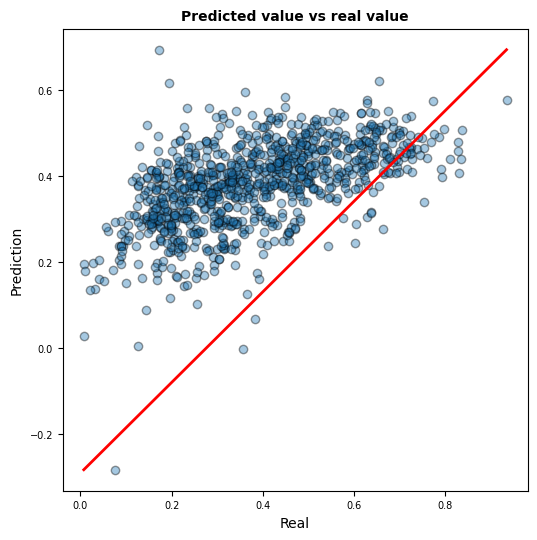

In [59]:
# figura 1
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(y_train, prediction_train, edgecolors=(0, 0, 0), alpha = 0.4)
ax.plot([y_train.min(), y_train.max()], [prediction_train.min(), prediction_train.max()],
                'r', color = 'red', lw=2)
ax.set_title('Predicted value vs real value', fontsize = 10, fontweight = "bold")
ax.set_xlabel('Real')
ax.set_ylabel('Prediction')
ax.tick_params(labelsize = 7)

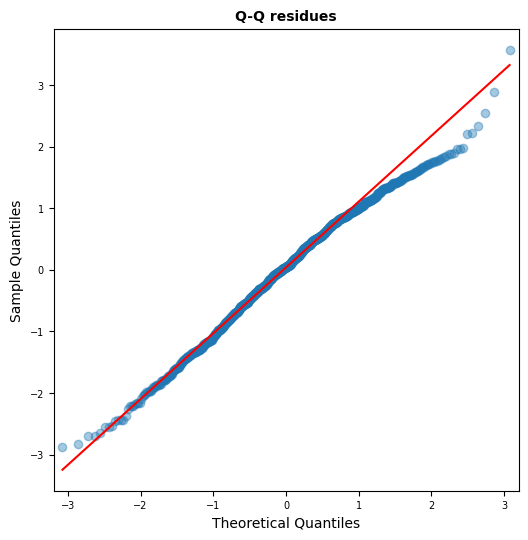

In [61]:
#figura 2
fig, ax = plt.subplots(figsize=(6, 6))
sm.qqplot(
    residues_train,
    fit=True,
    line='q',
    ax=ax,  # Pasamos el eje explícitamente
    color='firebrick',
    alpha=0.4,
    lw=2
)
ax.set_title('Q-Q residues', fontsize=10, fontweight="bold")
ax.tick_params(labelsize=7)
plt.show()

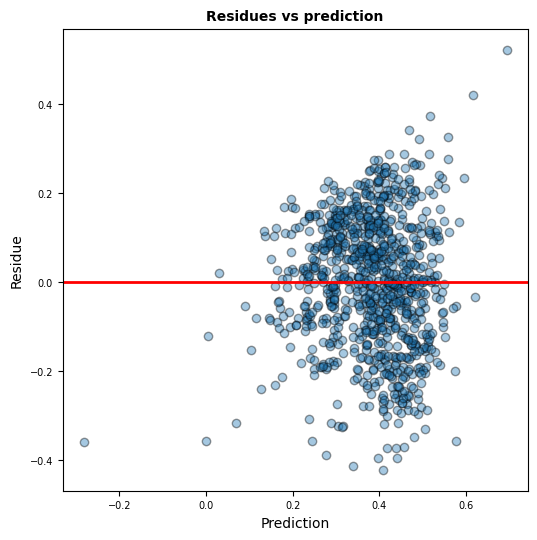

In [63]:
#figura 3
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(prediction_train, residues_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
ax.axhline(y = 0, color = 'red', lw=2)
ax.set_title('Residues vs prediction', fontsize = 10, fontweight = "bold")
ax.set_xlabel('Prediction')
ax.set_ylabel('Residue')
ax.tick_params(labelsize = 7)

In [64]:
shapiro_test = stats.shapiro(residues_train)
shapiro_test

ShapiroResult(statistic=0.9917367696762085, pvalue=3.882962846546434e-05)

In [65]:
k2, p_value = stats.normaltest(residues_train)
print(f"Statistic= {k2}, p-value = {p_value}")

Statistic= 11.598253929203423, p-value = 0.0030301990619618184


In [66]:
predictions = modelf_noint.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predictions.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.576863,0.010909,0.555455,0.598272,0.288099,0.865628
1,0.195201,0.027435,0.141360,0.249042,-0.097759,0.488161
2,0.523609,0.008973,0.505999,0.541219,0.235101,0.812117
3,0.439540,0.007456,0.424908,0.454172,0.151198,0.727881


In [67]:
predictions = modelf_noint.predict(exog = X_test[list(X_train.columns)])
mse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predictions
       )
print("")
rmse = np.sqrt(mse)
print(f"The test error (rmse) is: {rmse}")


The test error (rmse) is: 0.15559920298602786


In [68]:
y.min(),y.mean(),y.max()

(0.0007475069942631974, 0.37987980613353994, 0.934210309322705)

In [69]:
X.describe()

,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,pl_orbeccen,ttv_flag,st_teff,st_rad,st_mass,st_logg,sy_vmag,sy_kmag
count,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000
mean,1.195431,1.675973,23.786868,0.111289,9.020524,365.877780,0.088729,0.102369,5421.643511,1.127893,0.989653,4.390406,11.798747,9.720131
std,0.439243,1.230056,131.101454,0.230093,5.790948,778.671425,0.140899,0.303261,904.353846,0.534411,0.304098,0.286323,2.115148,1.906986
min,1.000000,1.000000,0.179715,0.005800,0.510000,0.070000,0.000000,0.000000,2960.000000,0.010000,0.140000,2.950000,5.569110,3.261000
25%,1.000000,1.000000,2.980421,0.039135,2.858000,11.825000,0.000000,0.000000,5065.750000,0.800000,0.822500,4.230000,10.324000,8.426750
50%,1.000000,1.000000,4.611488,0.055255,10.180000,122.840990,0.030000,0.000000,5609.500000,1.020000,0.990000,4.400000,11.828000,9.788000
75%,1.000000,2.000000,11.499270,0.096975,13.502750,365.499503,0.119000,0.000000,6000.000000,1.400000,1.190000,4.550000,13.139500,11.001750
max,4.000000,6.000000,3650.000000,4.500000,25.000000,8899.000000,0.941200,1.000000,10170.000000,6.300000,2.520000,7.920000,17.350000,15.548000


In [70]:
new_X = X.drop(columns=["st_rad","pl_orbper","sy_kmag","sy_vmag","ttv_flag","st_logg"])

coefficients = modelf_noint.params.tolist()
means = new_X.mean().tolist()
weighted_means = [coef * mean for coef, mean in zip(coefficients, means)]
weighted_means

[-0.08456365065073844,
 -0.07979673264566582,
 -0.010088670977466931,
 -0.023727500294297023,
 -0.01814405452815518,
 -0.017858321404942243,
 1.05938062354091,
 -0.44587242810928746]

In [71]:
df_wm = pd.DataFrame(weighted_means, new_X.columns)
df_wm.columns = ["weighted_mean"]
df_wm

,weighted_mean
sy_snum,-0.084564
sy_pnum,-0.079797
pl_orbsmax,-0.010089
pl_rade,-0.023728
pl_bmasse,-0.018144
pl_orbeccen,-0.017858
st_teff,1.059381
st_mass,-0.445872


In [72]:
X.describe()

corr_matrix = X.corr()